# Bank Marketing

4. Relevant Information:

   The data is related with direct marketing campaigns of a Portuguese banking institution. 
   The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, 
   in order to access if the product (bank term deposit) would be (or not) subscribed. 

   There are two datasets: 
      1) bank-full.csv with all examples, ordered by date (from May 2008 to November 2010).
      2) bank.csv with 10% of the examples (4521), randomly selected from bank-full.csv.
   The smallest dataset is provided to test more computationally demanding machine learning algorithms (e.g. SVM).

   The classification goal is to predict if the client will subscribe a term deposit (variable y).

5. Number of Instances: 45211 for bank-full.csv (4521 for bank.csv)

6. Number of Attributes: 16 + output attribute.

7. Attribute information:

   For more information, read [Moro et al., 2011].

   Input variables:  
   # bank client data:  
   1 - age (numeric)  
   2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",  
                                       "blue-collar","self-employed","retired","technician","services")   
   3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)  
   4 - education (categorical: "unknown","secondary","primary","tertiary")  
   5 - default: has credit in default? (binary: "yes","no")  
   6 - balance: average yearly balance, in euros (numeric)   
   7 - housing: has housing loan? (binary: "yes","no")  
   8 - loan: has personal loan? (binary: "yes","no")  
   # related with the last contact of the current campaign:  
   9 - contact: contact communication type (categorical: "unknown","telephone","cellular")   
  10 - day: last contact day of the month (numeric)  
  11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")  
  12 - duration: last contact duration, in seconds (numeric)  
   # other attributes:  
  13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)  
  14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was   not previously contacted)  
  15 - previous: number of contacts performed before this campaign and for this client (numeric)  
  16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")  

  Output variable (desired target):  
  17 - y - has the client subscribed a term deposit? (binary: "yes","no")

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [70]:
# Vamos a cargar el dataset de train

df_raw = pd.read_csv(r'C:\Users\Marcos\BootCamp_DS\Repo_Clase\Copia para trabajar\3-Machine_Learning\Proyecto ML\Proyecto\bank_train.csv', sep=';')
df_raw

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [71]:
# No hay nulls
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [72]:
# Vamos a inspeccionar el numero de valores distintos en las columnas no numéricas
df = df_raw
for column in df.columns:
    if df.loc[:,column].dtype == 'O':
        print(df.loc[:,column].value_counts())
        print('#'*40)

job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: count, dtype: int64
########################################
marital
married     27214
single      12790
divorced     5207
Name: count, dtype: int64
########################################
education
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: count, dtype: int64
########################################
default
no     44396
yes      815
Name: count, dtype: int64
########################################
housing
yes    25130
no     20081
Name: count, dtype: int64
########################################
loan
no     37967
yes     7244
Name: count, dtype: int64
########################################
contact
cellular     29285
unknown      13020
telephone     2906
Name: count, dtype

In [73]:
# Las columnas de yes/no las cambiaremos por 1/0 y al resto le haremos un one hot encoder porque tienen varios valores
# y no hay ninguna lógica para asignar un valor mayor a una categoria u otra.
# A la categoria month, le voy a hacer un cyclic encoder, que consiste en asignar el coseno y el seno de los angulos
# que formamos partiendo una circunferencia en 12 partes iguales (12 partes por 12 meses)


In [74]:
# 1 Columnas de yes/no
# Tenemos ['default', 'housing', 'loan','y'] <-- y es el target

for column in ['default', 'housing', 'loan','y']:
    df.loc[:,column] = df.loc[:,column].apply(lambda x: 1 if x == 'yes' else 0)

In [75]:
# 2 Vamos ahora con la columna de los meses
# En primer lugar, cambiamos cada mes por un número
def month_num(x):
    if x == 'jan':
        return 1
    elif x == 'feb':
        return 2
    elif x == 'mar':
        return 3
    elif x == 'apr':
        return 4
    elif x == 'may':
        return 5
    elif x == 'jun':
        return 6
    elif x == 'jul':
        return 7
    elif x == 'aug':
        return 8
    elif x == 'sep':
        return 9
    elif x == 'oct':
        return 10
    elif x == 'nov':
        return 11
    elif x == 'dec':
        return 12
    else:
        return -1
df.loc[:,'month'] = df.loc[:,'month'].apply(month_num)

In [76]:
df['month'] = pd.to_numeric(df['month'], errors='coerce')
# Cambio el tipo de la columna a numerico, y lo error es por si hay algun nan, que no es el caso
# podria haber hecho un astype(float)

In [77]:
# Vamos ahora con la transformacion en sí, con esta transformacion, saldran dos nuevas columnas en vez de 12 como salen
# con un one hot encoder
df.loc[:,'month_sin'] = np.sin(((df.loc[:,'month']-1)*(2*np.pi))/12)
df.loc[:,'month_cos'] = np.cos(((df.loc[:,'month']-1)*(2*np.pi))/12)

In [78]:
# Quitamos la columna month
df = df.drop(columns='month')

In [79]:
# 3. Hacemos lo mismo con la columna day
df.loc[:,'day_sin'] = np.sin(((df.loc[:,'day']-1)*(2*np.pi))/31)
df.loc[:,'day_cos'] = np.cos(((df.loc[:,'day']-1)*(2*np.pi))/31)
df = df.drop(columns='day')

In [80]:
# 4. Resto de columnas no numéricas, aplicamos one hot encoder (con get_dummies) y listo
# las columnas son ['job', 'marital', 'education','contact', 'poutcome']
df = pd.get_dummies(df, columns=['job', 'marital', 'education','contact', 'poutcome'], drop_first=True, dtype=int)

In [81]:
# Listo
df

,age,default,balance,housing,loan,duration,campaign,pdays,previous,y,...,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown
0,58,0,2143,1,0,261,1,-1,0,0,...,1,0,0,1,0,0,1,0,0,1
1,44,0,29,1,0,151,1,-1,0,0,...,0,1,1,0,0,0,1,0,0,1
2,33,0,2,1,1,76,1,-1,0,0,...,1,0,1,0,0,0,1,0,0,1
3,47,0,1506,1,0,92,1,-1,0,0,...,1,0,0,0,1,0,1,0,0,1
4,33,0,1,0,0,198,1,-1,0,0,...,0,1,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,0,825,0,0,977,3,-1,0,1,...,1,0,0,1,0,0,0,0,0,1
45207,71,0,1729,0,0,456,2,-1,0,1,...,0,0,0,0,0,0,0,0,0,1
45208,72,0,5715,0,0,1127,5,184,3,1,...,1,0,1,0,0,0,0,0,1,0
45209,57,0,668,0,0,508,4,-1,0,0,...,1,0,1,0,0,1,0,0,0,1


In [82]:
# Vamos con las features y el target, en este caso no haremos train_test_split porque tenemos datos de test en otro csv
x_train = df.drop(columns='y')
y_train = df.loc[:,'y']

In [83]:
y_train = y_train.astype(int) # Convertimos la columna a numerico

In [84]:
# Importamos las librerías necesarías de Machine Learning
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_validate, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, r2_score, f1_score, confusion_matrix, classification_report

In [85]:
# Vamos a ver como estan distribuidas las clases del target
y_train.value_counts()

y
0    39922
1     5289
Name: count, dtype: int64

In [86]:
# Evidentemente muy desbalanceada, eso es normal pues de todas las llamadas telefónicas solo unas pocas consiguen
# vender el servicio al cliente; es por eso que la métrica accuracy no nos será muy útil para este estudio
# Ya veremos si nos centramos en precision o recall, dependiendo de si queremos priorizar falsos negativos o positivos

In [87]:
x_train.describe()

,age,balance,duration,campaign,pdays,previous,month_sin,month_cos,day_sin,day_cos,...,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,4.521100e+04,45211.000000,45211.000000,...,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,258.163080,2.763841,40.197828,0.580323,0.251128,-3.980684e-01,0.048195,-0.099327,...,0.601933,0.282896,0.513194,0.294198,0.041074,0.064276,0.287983,0.040698,0.033421,0.817478
std,10.618762,3044.765829,257.527812,3.098021,100.128746,2.303441,0.640129,6.072296e-01,0.687449,0.717807,...,0.489505,0.450411,0.499831,0.455687,0.198464,0.245247,0.452828,0.197592,0.179735,0.386278
min,18.000000,-8019.000000,0.000000,1.000000,-1.000000,0.000000,-1.000000,-1.000000e+00,-0.998717,-0.994869,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.000000,72.000000,103.000000,1.000000,-1.000000,0.000000,-0.500000,-8.660254e-01,-0.651372,-0.758758,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,39.000000,448.000000,180.000000,2.000000,-1.000000,0.000000,0.500000,-5.000000e-01,0.101168,-0.250653,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,48.000000,1428.000000,319.000000,3.000000,-1.000000,0.000000,0.866025,6.123234e-17,0.724793,0.688967,...,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,95.000000,102127.000000,4918.000000,63.000000,871.000000,275.000000,1.000000,1.000000e+00,0.998717,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [88]:
# Vamos a escalar el dato
stc = StandardScaler()
stc.fit(x_train)
x_norm_train = stc.transform(x_train) # Esto es un array
x_norm_df_train = pd.DataFrame(x_norm_train, columns=x_train.columns) # Lo convertimos otra vez a df
x_norm_df_train

,age,default,balance,housing,loan,duration,campaign,pdays,previous,month_sin,...,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown
0,1.606965,-0.13549,0.256419,0.893915,-0.436803,0.011016,-0.569351,-0.411453,-0.251940,0.960594,...,0.813212,-0.628090,-1.026745,1.548892,-0.206962,-0.262091,1.572395,-0.205972,-0.185948,0.472519
1,0.288529,-0.13549,-0.437895,0.893915,-0.436803,-0.416127,-0.569351,-0.411453,-0.251940,0.960594,...,-1.229691,1.592128,0.973952,-0.645623,-0.206962,-0.262091,1.572395,-0.205972,-0.185948,0.472519
2,-0.747384,-0.13549,-0.446762,0.893915,2.289359,-0.707361,-0.569351,-0.411453,-0.251940,0.960594,...,0.813212,-0.628090,0.973952,-0.645623,-0.206962,-0.262091,1.572395,-0.205972,-0.185948,0.472519
3,0.571051,-0.13549,0.047205,0.893915,-0.436803,-0.645231,-0.569351,-0.411453,-0.251940,0.960594,...,0.813212,-0.628090,-1.026745,-0.645623,4.831796,-0.262091,1.572395,-0.205972,-0.185948,0.472519
4,-0.747384,-0.13549,-0.447091,-1.118674,-0.436803,-0.233620,-0.569351,-0.411453,-0.251940,0.960594,...,-1.229691,1.592128,-1.026745,-0.645623,4.831796,-0.262091,1.572395,-0.205972,-0.185948,0.472519
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,0.947747,-0.13549,-0.176460,-1.118674,-0.436803,2.791329,0.076230,-0.411453,-0.251940,-1.745219,...,0.813212,-0.628090,-1.026745,1.548892,-0.206962,-0.262091,-0.635972,-0.205972,-0.185948,0.472519
45207,2.831227,-0.13549,0.120447,-1.118674,-0.436803,0.768224,-0.246560,-0.411453,-0.251940,-1.745219,...,-1.229691,-0.628090,-1.026745,-0.645623,-0.206962,-0.262091,-0.635972,-0.205972,-0.185948,0.472519
45208,2.925401,-0.13549,1.429593,-1.118674,-0.436803,3.373797,0.721811,1.436189,1.050473,-1.745219,...,0.813212,-0.628090,0.973952,-0.645623,-0.206962,-0.262091,-0.635972,-0.205972,5.377848,-2.116316
45209,1.512791,-0.13549,-0.228024,-1.118674,-0.436803,0.970146,0.399020,-0.411453,-0.251940,-1.745219,...,0.813212,-0.628090,0.973952,-0.645623,-0.206962,3.815470,-0.635972,-0.205972,-0.185948,0.472519


In [143]:
# Vamos a probar un Random Forest rápido para hacernos una idea de la calidad del dato
rf = RandomForestClassifier(n_estimators=80, max_depth=5, class_weight='balanced')

# Le metemos distintas métricas
scoring_metrics = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1_score': 'f1'
}

# n_splits define el número de folds 
kf = KFold(n_splits=5, shuffle=True, random_state=42) 

cv_results = cross_validate(rf, x_norm_df_train, y_train, cv=kf, scoring=scoring_metrics, return_train_score=True)


In [144]:
# Vamos a sacar la media de las metricas en test
for metric in ['test_precision', 'test_recall', 'test_f1_score']:
    print(metric,np.mean(cv_results[metric]))

test_precision 0.36628985939899505
test_recall 0.8448778674435526
test_f1_score 0.5109088632519775


In [122]:
# Vamos a probar ahora con XGboost 

# El hiperparametro class_weight='balanced' no existe en modelos fuera de scikit-learn,
# hay que hacerlo asi:
neg_count = (y_train == 0).sum()
pos_count = (y_train == 1).sum()
scale_pos_weight_value = neg_count / pos_count

xg = XGBClassifier(n_estimators=80, max_depth=5, scale_pos_weight=scale_pos_weight_value) # <--- IMPORTANTE

# Le metemos distintas métricas
scoring_metrics = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1_score': 'f1'
}

# n_splits define el número de folds 
kf = KFold(n_splits=5, shuffle=True, random_state=42) 

cv_results = cross_validate(xg, x_norm_df_train, y_train, cv=kf, scoring=scoring_metrics, return_train_score=True)


In [123]:
# Vamos a sacar la media de las metricas en test
for metric in ['test_precision', 'test_recall', 'test_f1_score']:
    print(metric,np.mean(cv_results[metric]))

test_precision 0.4547977044942864
test_recall 0.8543122068499234
test_f1_score 0.5935451107488628


In [93]:
# Vamos a probar ahora linear regressor
lr = LogisticRegression()

# Le metemos distintas métricas
scoring_metrics = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1_score': 'f1'
}

# n_splits define el número de folds 
kf = KFold(n_splits=5, shuffle=True, random_state=42) 

cv_results = cross_validate(lr, x_norm_df_train, y_train, cv=kf, scoring=scoring_metrics, return_train_score=True)


In [94]:
# Vamos a sacar la media de las metricas en test
for metric in ['test_precision', 'test_recall', 'test_f1_score']:
    print(metric,np.mean(cv_results[metric]))

test_precision 0.6393203080326932
test_recall 0.3198495703108225
test_f1_score 0.42633458384941064


In [ ]:
# Vamos a probar ahora lgmb

# El hiperparametro class_weight='balanced' no existe en modelos fuera de scikit-learn,
# hay que hacerlo asi:
neg_count = (y_train == 0).sum()
pos_count = (y_train == 1).sum()
scale_pos_weight_value = neg_count / pos_count

lgbm = LGBMClassifier(n_estimators=100, 
                      max_depth=7, 
                      class_weight='balanced', #<--- IMPORTANTE
                      min_child_samples=1)

# Le metemos distintas métricas
scoring_metrics = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1_score': 'f1'
}

# n_splits define el número de folds 
kf = KFold(n_splits=5, shuffle=True, random_state=42) 

cv_results = cross_validate(lgbm, x_norm_df_train, y_train, cv=kf, scoring=scoring_metrics, return_train_score=True)


[LightGBM] [Info] Number of positive: 4198, number of negative: 31970
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002054 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1064
[LightGBM] [Info] Number of data points in the train set: 36168, number of used features: 34
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Info] Number of positive: 4279, number of negative: 31890
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001593 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1065
[LightGBM] [Info] Number of data points in the train set: 36169, number of used features: 34
[LightGBM] [Info] [b

In [118]:
# Vamos a sacar la media de las metricas en test
for metric in ['test_precision', 'test_recall', 'test_f1_score']:
    print(metric,np.mean(cv_results[metric]))

test_precision 0.44303394715228317
test_recall 0.88188155303874
test_f1_score 0.5897423392768613


In [119]:
# Vamos a definir que mi modelo asigne que el cliente ha hecho el deposito si la prob de la prediccion es mayor a 0.7
lgbm.fit(x_norm_df_train, y_train)
y_probs = lgbm.predict_proba(x_norm_df_train)[:,1]
y_probs = (y_probs > 0.7).astype(int)

[LightGBM] [Info] Number of positive: 5289, number of negative: 39922
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002446 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1067
[LightGBM] [Info] Number of data points in the train set: 45211, number of used features: 34
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.116985 -> initscore=-2.021298
[LightGBM] [Info] Start training from score -2.021298


In [98]:
y_probs

array([0, 0, 0, ..., 1, 0, 0])

In [99]:
print(precision_score(y_train, y_probs))
print(recall_score(y_train, y_probs))

0.5730688935281837
0.8304027226318775


## Pequeño Resumen  
Parece ser que mis mejores modelos hasta ahora son  LightGBM y XGBoost, además si cambiamos el umbral para que el modelo diga si el cliente hará el depósito a una probabilidad mayor a 0.7, las dos métricas tienden a balancearse, que es lo que buscamos. Vamos a hacer un GridSearch para encontrar los mejores hiperparámetros de nuestro modelo. Antes de hacer eso, vamos a hacer las transformaciones pertienentes al conjunto de test.

In [100]:
# CELDA PARA IMPORTAR LOS DATOS DE TEST Y TRANSFORMARLOS

df_raw = pd.read_csv(r'C:\Users\Marcos\BootCamp_DS\Repo_Clase\Copia para trabajar\3-Machine_Learning\Proyecto ML\Proyecto\bank_test.csv', sep=';')
df = df_raw
# 1 Columnas de yes/no
# Tenemos ['default', 'housing', 'loan','y'] <-- y es el target

for column in ['default', 'housing', 'loan','y']:
    df.loc[:,column] = df.loc[:,column].apply(lambda x: 1 if x == 'yes' else 0)

    # 2 Vamos ahora con la columna de los meses
# En primer lugar, cambiamos cada mes por un número
def month_num(x):
    if x == 'jan':
        return 1
    elif x == 'feb':
        return 2
    elif x == 'mar':
        return 3
    elif x == 'apr':
        return 4
    elif x == 'may':
        return 5
    elif x == 'jun':
        return 6
    elif x == 'jul':
        return 7
    elif x == 'aug':
        return 8
    elif x == 'sep':
        return 9
    elif x == 'oct':
        return 10
    elif x == 'nov':
        return 11
    elif x == 'dec':
        return 12
    else:
        return -1
df.loc[:,'month'] = df.loc[:,'month'].apply(month_num)

df['month'] = pd.to_numeric(df['month'], errors='coerce')
# Cambio el tipo de la columna a numerico, y lo error es por si hay algun nan, que no es el caso
# podria haber hecho un astype(float)

# Vamos ahora con la transformacion en sí, con esta transformacion, saldran dos nuevas columnas en vez de 12 como salen
# con un one hot encoder
df.loc[:,'month_sin'] = np.sin(((df.loc[:,'month']-1)*(2*np.pi))/12)
df.loc[:,'month_cos'] = np.cos(((df.loc[:,'month']-1)*(2*np.pi))/12)

# Quitamos la columna month
df = df.drop(columns='month')

# 3. Hacemos lo mismo con la columna day
df.loc[:,'day_sin'] = np.sin(((df.loc[:,'day']-1)*(2*np.pi))/31)
df.loc[:,'day_cos'] = np.cos(((df.loc[:,'day']-1)*(2*np.pi))/31)
df = df.drop(columns='day')

# 4. Resto de columnas no numéricas, aplicamos one hot encoder (con get_dummies) y listo
# las columnas son ['job', 'marital', 'education','contact', 'poutcome']
df = pd.get_dummies(df, columns=['job', 'marital', 'education','contact', 'poutcome'], drop_first=True, dtype=int)

In [124]:
# PREPARAMOS LOS DATOS

x_test = df.drop(columns='y')
y_test = df.loc[:,'y']
y_test = y_test.astype(int) # Convertimos la columna a numerico

# Vamos a escalar el dato
stc = StandardScaler()
stc.fit(x_test)
x_norm_test = stc.transform(x_test) # Esto es un array
x_test = pd.DataFrame(x_norm_test, columns=x_test.columns) # Lo convertimos otra vez a df


In [126]:
parameters = {
    'n_estimators':[50,60,70,80,90,100,120,150,200],
    'max_depth': [2,3,4,5,6,7],
    'min_samples_split': [2,3,4,5,7]
}

xgboost = XGBClassifier(scale_pos_weight=scale_pos_weight_value)

gs = GridSearchCV(estimator = xgboost,
                  param_grid = parameters,
                  n_jobs = -1, # para modelos paralelizables (este no lo es), usa todos los threads del cpu
                  cv = 5)

gs.fit(x_norm_df_train,y_train)

c:\Users\Marcos\miniconda3\envs\data_analysis_env\Lib\site-packages\xgboost\training.py:183: UserWarning: [10:06:30] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, feature_weights=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=Non...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7],
                         'min_samples_split': [2, 3, 4, 5, 7],
                         'n_estimators': [50, 60, 70, 80, 90, 100, 120, 150,
                                          200]})

In [127]:
best_model = gs.best_estimator_

In [168]:
import pickle
with open('best_model.pkl', 'wb') as file:
    pickle.dump(best_model, file)

In [129]:
best_model.fit(x_norm_df_train, y_train)
print(classification_report(y_test, best_model.predict(x_test)))

              precision    recall  f1-score   support

           0       0.98      0.67      0.80      4000
           1       0.27      0.92      0.41       521

    accuracy                           0.70      4521
   macro avg       0.63      0.79      0.60      4521
weighted avg       0.90      0.70      0.75      4521



c:\Users\Marcos\miniconda3\envs\data_analysis_env\Lib\site-packages\xgboost\training.py:183: UserWarning: [10:07:14] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [130]:
# VAMOS A HACER UN SELECTK BEST PARA QUITAR COLUMNAS Y VER SI NUESTRO MODELO MEJORA EN PRECISION

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif, f_classif

# --- CONFIGURACIÓN ---
score_function = f_classif

# Número de características a seleccionar.
k_features = 8

# --- APLICAR SELECTKBEST ---

# 1. Inicializar SelectKBest
selector = SelectKBest(score_func=score_function, k=k_features)

# 2. Ajustar SelectKBest solo en el conjunto de entrenamiento procesado
#    Esto calcula la "importancia" de cada característica.
selector.fit(x_norm_df_train, y_train)

# 3. Transformar tanto el conjunto de entrenamiento como el de prueba
#    Esto selecciona las 'k' mejores características en ambos conjuntos.
x_train_selected = selector.transform(x_norm_df_train)
x_test_selected = selector.transform(x_test)


best_model.fit(x_train_selected, y_train)
print(classification_report(y_test, best_model.predict(x_test_selected)))

              precision    recall  f1-score   support

           0       0.99      0.60      0.75      4000
           1       0.23      0.93      0.37       521

    accuracy                           0.64      4521
   macro avg       0.61      0.77      0.56      4521
weighted avg       0.90      0.64      0.70      4521



c:\Users\Marcos\miniconda3\envs\data_analysis_env\Lib\site-packages\xgboost\training.py:183: UserWarning: [10:07:33] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [131]:
# Lo interesante de lo anterior es que hemos quitado unas 25 features y nuestras métricas se conservan

# Obtener la máscara booleana de las características seleccionadas
selected_features_mask = selector.get_support()

# Usar la máscara para obtener los nombres de las columnas seleccionadas
features_seleccionadas = x_norm_df_train.columns[selected_features_mask]

# Imprimir la lista de las características seleccionadas
print("Características seleccionadas por SelectKBest:")
print(list(features_seleccionadas))

Características seleccionadas por SelectKBest:
['housing', 'duration', 'pdays', 'previous', 'month_cos', 'contact_unknown', 'poutcome_success', 'poutcome_unknown']


In [132]:
# AQUI TENEMOS LA IMPORTANCIA DE LAS FEATURES

peso_features = dict()
features = []
pesos = []
for feature, peso in zip(x_norm_df_train.columns, selector.scores_):
    features.append(feature)
    pesos.append(peso)

peso_features['features'] = features
peso_features['pesos'] = pesos

feature_importance = pd.DataFrame(peso_features)
feature_importance.sort_values('pesos', ascending=False).head(8)

,features,pesos
5,duration,8333.761148
32,poutcome_success,4697.113837
33,poutcome_unknown,1297.815887
30,contact_unknown,1053.932776
3,housing,892.950576
7,pdays,490.696563
8,previous,396.443989
10,month_cos,327.891187


In [133]:
class_and_prob_target1 = pd.DataFrame(
{
    'prediction_class': best_model.predict(x_test_selected),
    'prob_pred':best_model.predict_proba(x_test_selected)[:,1]
}
)
mask = class_and_prob_target1.loc[:,'prediction_class'] == 1
class_and_prob_target1.loc[mask,:].head(5)

,prediction_class,prob_pred
2,1,0.505735
4,1,0.552855
5,1,0.567951
6,1,0.604414
9,1,0.832948


In [140]:
# Vamos a decir a nuestro modelo que diga que el cliente hara un deposito (clase 1) si tiene una probabilidad mayor a un cierto umbral
# asi eliminaremos muchos falsos positivos (casos que mi modelo dice que si haran deposito pero al final no)
# Vamos a redefinir y_pred

umbral = 0.75
y_pred_umbral = (best_model.predict_proba(x_test_selected)[:,1] >= umbral).astype(int)

print(f"--- Métricas con umbral de confianza = {umbral} ---")
print(classification_report(y_test, y_pred_umbral, target_names=['No Depósito (0)', 'Depósito (1)']))

--- Métricas con umbral de confianza = 0.75 ---
                 precision    recall  f1-score   support

No Depósito (0)       0.96      0.86      0.91      4000
   Depósito (1)       0.41      0.74      0.52       521

       accuracy                           0.85      4521
      macro avg       0.68      0.80      0.72      4521
   weighted avg       0.90      0.85      0.86      4521



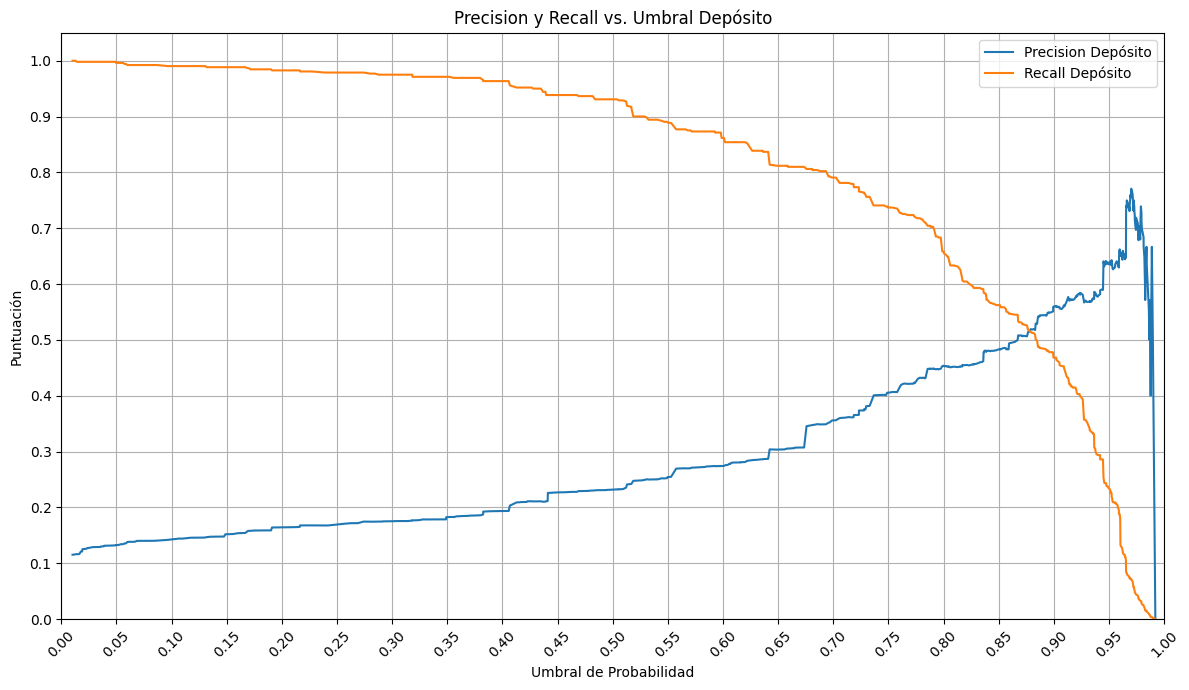

In [169]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_test, best_model.predict_proba(x_test_selected)[:,1])

plt.figure(figsize=(12, 7))
plt.plot(thresholds, precisions[:-1], label='Precision Depósito')
plt.plot(thresholds, recalls[:-1], label='Recall Depósito')
plt.title('Precision y Recall vs. Umbral Depósito')
plt.xlabel('Umbral de Probabilidad')
plt.ylabel('Puntuación')
plt.grid(True)
plt.legend()
plt.xticks(np.arange(0.0, 1.05, 0.05), rotation=45)
plt.yticks(np.arange(0.0, 1.05, 0.1))
plt.ylim(0, 1.05)
plt.xlim(0, 1)
plt.tight_layout()
plt.show()

### Análisis de Errores

In [150]:
# Vamos a construir un df donde veamos el valor real y nuestras predicciones
df_raw = df_raw.drop(columns=['month_sin', 'month_cos'])

In [ ]:
# Este es el df de test, vamos a añadirle nuestras predicciones
df_raw

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,0,1787,0,0,cellular,19,10,79,1,-1,0,unknown,0
1,33,services,married,secondary,0,4789,1,1,cellular,11,5,220,1,339,4,failure,0
2,35,management,single,tertiary,0,1350,1,0,cellular,16,4,185,1,330,1,failure,0
3,30,management,married,tertiary,0,1476,1,1,unknown,3,6,199,4,-1,0,unknown,0
4,59,blue-collar,married,secondary,0,0,1,0,unknown,5,5,226,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,0,-333,1,0,cellular,30,7,329,5,-1,0,unknown,0
4517,57,self-employed,married,tertiary,1,-3313,1,1,unknown,9,5,153,1,-1,0,unknown,0
4518,57,technician,married,secondary,0,295,0,0,cellular,19,8,151,11,-1,0,unknown,0
4519,28,blue-collar,married,secondary,0,1137,0,0,cellular,6,2,129,4,211,3,other,0


In [152]:
df_test = pd.concat([df_raw, pd.DataFrame({'predictions':y_pred_umbral})], axis = 1)

In [154]:
df_test
# Filtramos para ver aquellas en las que nos hemos equivocado
mask = (df_test.loc[:,'y'] != df_test.loc[:,'predictions'])
df_test.loc[mask,:]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,predictions
9,43,services,married,primary,0,-88,1,1,cellular,17,4,313,1,147,2,failure,0,1
34,49,technician,married,tertiary,0,1235,0,0,cellular,13,8,354,3,-1,0,unknown,1,0
36,78,retired,divorced,primary,0,229,0,0,telephone,22,10,97,1,-1,0,unknown,1,0
37,32,blue-collar,married,secondary,0,2089,1,0,cellular,14,11,132,1,-1,0,unknown,1,0
40,38,management,single,tertiary,0,11971,1,0,unknown,17,11,609,2,101,3,failure,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4507,33,services,married,secondary,0,288,1,0,cellular,17,4,306,1,-1,0,unknown,0,1
4508,42,admin.,married,unknown,0,642,1,1,unknown,16,5,509,2,-1,0,unknown,0,1
4512,40,blue-collar,married,secondary,0,1100,1,0,unknown,29,5,660,2,-1,0,unknown,0,1
4515,32,services,single,secondary,0,473,1,0,cellular,7,7,624,5,-1,0,unknown,0,1


In [157]:
# Empezamos viendo aquellos casos en los que mi modelo dijo que si haria el deposito y al final no se hizo (Falsos Positivos)
mask = (df_test.loc[:,'y'] == 0) & (df_test.loc[:,'predictions'] == 1)
false_pos = df_test.loc[mask,:]

In [160]:
false_pos.to_csv('false_positives.csv')

In [162]:
# Vamos ahora con los casos en los que mi modelo dijo que no haria deposito y si lo hizo Falsos Negativos 
# Oportunidades de captar clientes perdidas

mask = (df_test.loc[:,'y'] == 1) & (df_test.loc[:,'predictions'] == 0)
false_neg = df_test.loc[mask,:]

In [164]:
false_neg.to_csv('false_negatives.csv')

In [167]:
# --- 1. Análisis de Variables Categóricas (Frecuencias Absolutas y Porcentajes) ---
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

print("### Frecuencia y Porcentaje de Categorías en Falsos Negativos ###")
for col in categorical_cols:
    if col in false_neg.columns:
        print(f"\nColumna: '{col}'")
        counts = false_neg[col].value_counts(dropna=False) # Incluye NaNs si los hay
        percentages = false_neg[col].value_counts(normalize=True, dropna=False) * 100

        # Crear un DataFrame para mostrar ambos
        combined_df = pd.DataFrame({'Count': counts, 'Percentage': percentages.round(2)})
        print(combined_df)
    else:
        print(f"\nADVERTENCIA: La columna '{col}' no se encontró en el DataFrame 'false_neg'.")


# --- 2. Análisis de Variables Numéricas (Estadísticas Descriptivas y Rangos Clave) ---
numerical_cols = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

print("\n### Estadísticas Descriptivas de Variables Numéricas en Falsos Negativos ###")
for col in numerical_cols:
    if col in false_neg.columns:
        print(f"\nColumna: '{col}'")
        print(false_neg[col].describe().round(2))

        # Además, para algunas numéricas, ver rangos puede ser muy útil
        # Ej: Balance (saldos negativos, saldos muy altos, saldo cero)
        if col == 'balance':
            print("\n- Distribución de 'balance':")
            # Definir bins para rangos significativos
            balance_bins = [-float('inf'), -1, 0, 100, 1000, 5000, 10000, float('inf')]
            balance_labels = ['Negativo', 'Cero', '0-100', '101-1000', '1001-5000', '5001-10000', '>10000']
            false_neg['balance_binned'] = pd.cut(false_neg['balance'], bins=balance_bins, labels=balance_labels, right=False)
            print(false_neg['balance_binned'].value_counts(normalize=True) * 100)
            false_neg = false_neg.drop(columns=['balance_binned']) # Limpiar columna temporal

        # Ej: Pdays (-1 es un valor especial)
        if col == 'pdays':
            print("\n- Conteo de 'pdays':")
            print(false_neg['pdays'].value_counts(normalize=True).round(2) * 100)
            # Podríamos agrupar los que no han sido contactados antes (-1) vs los que sí
            not_contacted_before = (false_neg['pdays'] == -1).sum()
            contacted_before = len(false_neg) - not_contacted_before
            print(f"  - Casos con pdays = -1 (no contactados antes): {not_contacted_before} ({not_contacted_before / len(false_neg) * 100:.2f}%)")
            print(f"  - Casos con pdays != -1 (contactados antes): {contacted_before} ({contacted_before / len(false_neg) * 100:.2f}%)")

        # Ej: Campaign (número de contactos en esta campaña)
        if col == 'campaign':
            print("\n- Conteo de 'campaign':")
            print(false_neg['campaign'].value_counts(normalize=True).sort_index().round(2) * 100)
            # Podríamos ver si hay muchos casos con campañas muy altas
            high_campaign_count = (false_neg['campaign'] >= 5).sum()
            print(f"  - Casos con campaign >= 5: {high_campaign_count} ({high_campaign_count / len(false_neg) * 100:.2f}%)")

    else:
        print(f"\nADVERTENCIA: La columna '{col}' no se encontró en el DataFrame 'false_neg'.")


### Frecuencia y Porcentaje de Categorías en Falsos Negativos ###

Columna: 'job'
               Count  Percentage
job                             
management        37       27.01
technician        21       15.33
retired           20       14.60
admin.            19       13.87
blue-collar       10        7.30
student            8        5.84
services           7        5.11
unemployed         4        2.92
self-employed      3        2.19
housemaid          3        2.19
entrepreneur       3        2.19
unknown            2        1.46

Columna: 'marital'
          Count  Percentage
marital                    
married      77       56.20
single       42       30.66
divorced     18       13.14

Columna: 'education'
           Count  Percentage
education                   
secondary     63       45.99
tertiary      55       40.15
primary       15       10.95
unknown        4        2.92

Columna: 'default'
         Count  Percentage
default                   
0          136       99.27

### Conclusiones sobre el análisis de errores  

En el dataset de Falsos Negativos predominan las clases -1 en pdays, que significa que no ha habido contacto previo con el cliente, y unknown en poutcome, que significa que el resultado de la campaña previa es desconocido; va unido a pdays.  
Es por eso que mi modelo está infravalorando el potencial de clientes con los que no se ha tenido contacto previamente y predice que no harán un depósito.

## Conclusión  
### Línea argumental del pitch  
Dentro de mis predicciones estan el 80% de los clientes potenciales, y cada vez que hago una llamada con una probabilidad de 70% sera cliente.  

"En resumen, hemos desarrollado un modelo que es altamente eficiente y estratégico para identificar a nuestros clientes potenciales.

Cuando nuestro sistema recomienda una llamada, 7 de cada 10 veces estaremos contactando a un cliente que realmente realizará un depósito. Esto optimiza enormemente el tiempo de nuestro equipo de ventas.

Además, nos aseguramos de que no perdemos la mayoría de las oportunidades: de cada 10 clientes que realmente quieren hacer un depósito, nuestro modelo es capaz de detectar y dirigirnos a 8 de ellos.

Esto significa más depósitos y menos llamadas improductivas, impulsando directamente nuestros objetivos de negocio."